# **Importing Basic Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import sklearn
print(sklearn.__version__)


1.3.2


In [2]:
df = pd.read_csv("..\dataset\FedCycleData071012.csv")
df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sahit\AppData\Local\Temp\ipykernel_13028\3329109010.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\dataset\FedCycleData071012.csv")


,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,
5,nfp8122,6,0,1,0,26,,15,11,10,...,,,,,,,,,,
6,nfp8122,7,0,1,0,29,,16,13,,...,,,,,,,,,,
7,nfp8122,8,0,1,2,24,,14,10,9,...,,,,,,,,,,
8,nfp8122,9,0,1,0,28,,16,12,9,...,,,,,,,,,,
9,nfp8122,10,0,1,0,28,,17,11,13,...,,,,,,,,,,


In [3]:
df.drop(['ClientID', 'Group'], axis=1, inplace=True)

# EDA And Data Cleaning

In [ ]:
df.shape

In [4]:
for cols in df.columns:
    print(f"{cols} : \n {df[cols].unique()} \n \n")

CycleNumber : 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] 
 

CycleWithPeakorNot : 
 [1 0] 
 

ReproductiveCategory : 
 [0 2 1 9] 
 

LengthofCycle : 
 [29 27 28 26 24 30 25 32 31 34 23 18 33 35 41 38 36 39 37 40 21 48 22 43
 45 54 42 20 44 49 19 51] 
 

MeanCycleLength : 
 ['27.33' ' ' '31' '26.33' '26.88' '25.33' '28.75' '25.88' '27.67' '26.75'
 '27.17' '32.83' '33.5' '32.6' '29' '30.36' '31.33' '27.58' '29.9' '25.15'
 '27' '32' '29.4' '27.43' '28.77' '27.62' '30.64' '29.67' '25.8' '25.23'
 '29.5' '34.07' '30.92' '30.25' '28.46' '28.15' '40' '33.92' '27.46'
 '26.69' '26.38' '26.42' '27.08' '30.75' '31.75' '28.23' '33.38' '30.15'
 '26.25' '33.46' '26.77' '38.81' '31.4' '27.36' '25.7' '31.55' '37.17'
 '30.83' '31.17' '27.15' '27.4' '35.95' '31.26' '27.78' '30.93' '25.4'
 '26.71' '29.82' '27.5' '26.85' '30.94' '33.83' '26.5' '25.5' '26.27'
 '28.17' '27.29' '27.75' '30.5' '30' '31.14' '29.1' '

**There are missing values in almost all columns as whitespace " " So let's replace them with nan**

In [13]:
df =df.replace(' ', np.nan)

In [14]:
df.isnull().sum()

CycleNumber                     0
CycleWithPeakorNot              0
ReproductiveCategory            0
LengthofCycle                   0
EstimatedDayofOvulation       150
LengthofLutealPhase           151
FirstDayofHigh                258
TotalNumberofHighDays          12
TotalHighPostPeak               3
TotalNumberofPeakDays          16
TotalDaysofFertility           31
TotalFertilityFormula           2
LengthofMenses                  4
MensesScoreDayOne               4
MensesScoreDayTwo               4
MensesScoreDayThree            25
MensesScoreDayFour             87
MensesScoreDayFive            434
TotalMensesScore                4
NumberofDaysofIntercourse       1
IntercourseInFertileWindow      1
UnusualBleeding                20
dtype: int64

In [15]:
cols_with_missing_cols= []
cols_without_missing_values = []
for cols in df.columns:   
    if df[cols].isnull().sum() == 0:
        cols_without_missing_values.append(cols)
        
    else:
        cols_with_missing_cols.append(cols)
        
print(f'Number of Columns without any missing values:  {len(cols_without_missing_values)}\n')
print(f'Number of Columns with missing values :  {len(cols_with_missing_cols)}')

Number of Columns without any missing values:  4

Number of Columns with missing values :  18


**There are 74 columns with missing values now let's handle them**

In [16]:
null = df.isnull().sum().sort_values(ascending=False)
null_per = ((df.isnull().sum()) / (df.shape[0])).sort_values(ascending=False)*100.
null_values = pd.DataFrame({
    "Column Name": null.index,
    "Total Number of Missing Values": null.values,
    "Missing Values in Percentage": null_per.values
})


C:\Users\sahit\AppData\Local\Temp\ipykernel_13028\2340846351.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


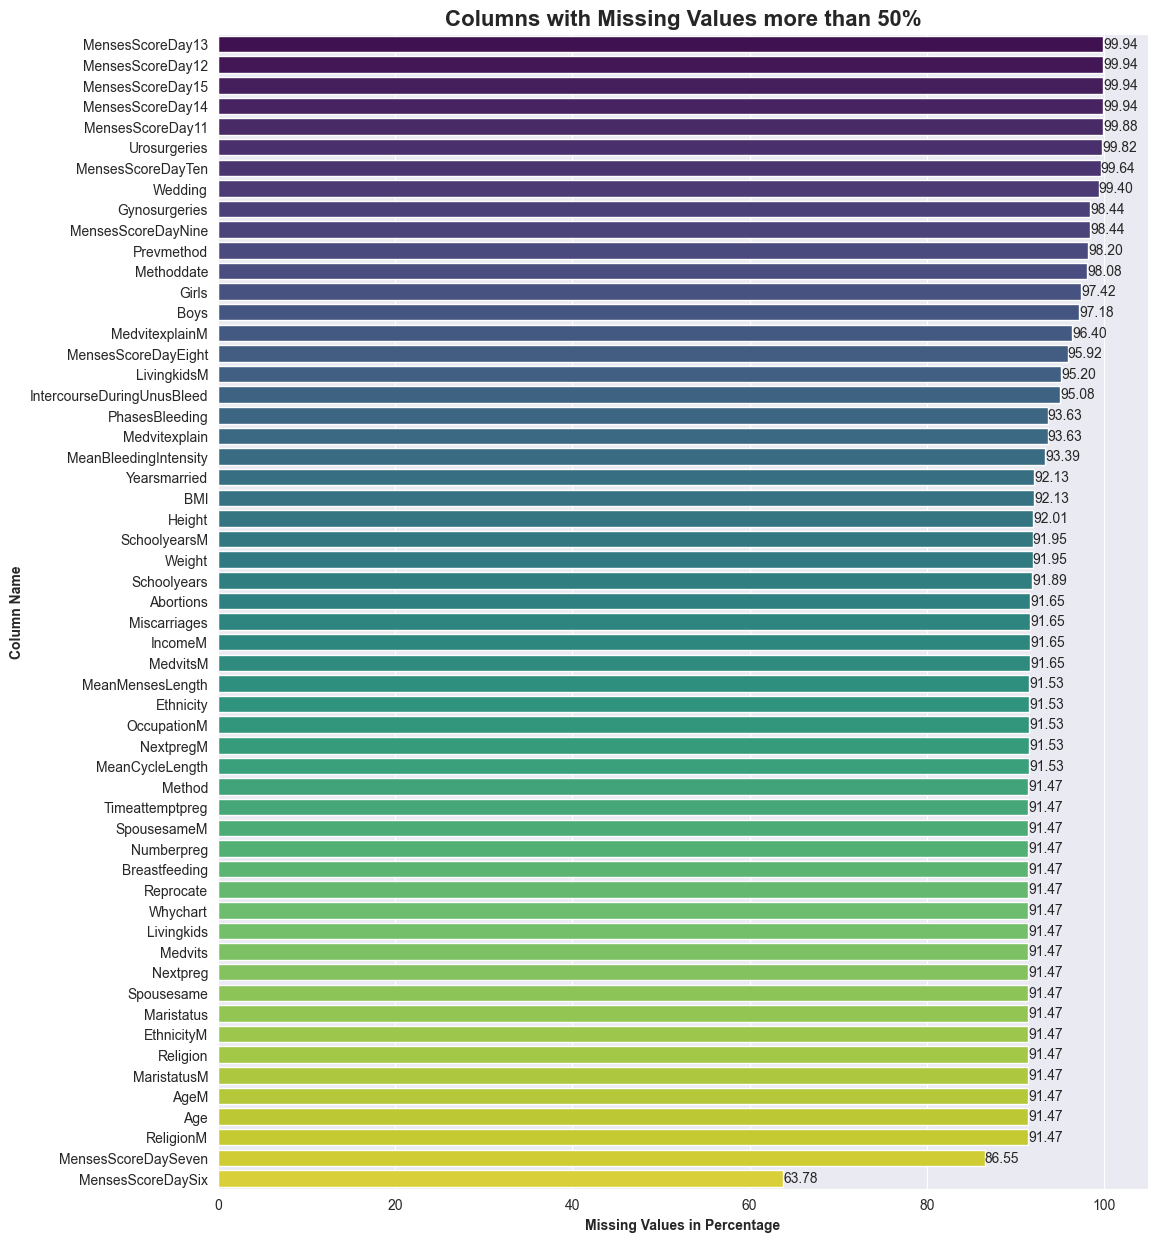

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 15))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values more than 50%',fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage',fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

C:\Users\sahit\AppData\Local\Temp\ipykernel_13028\2914675841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


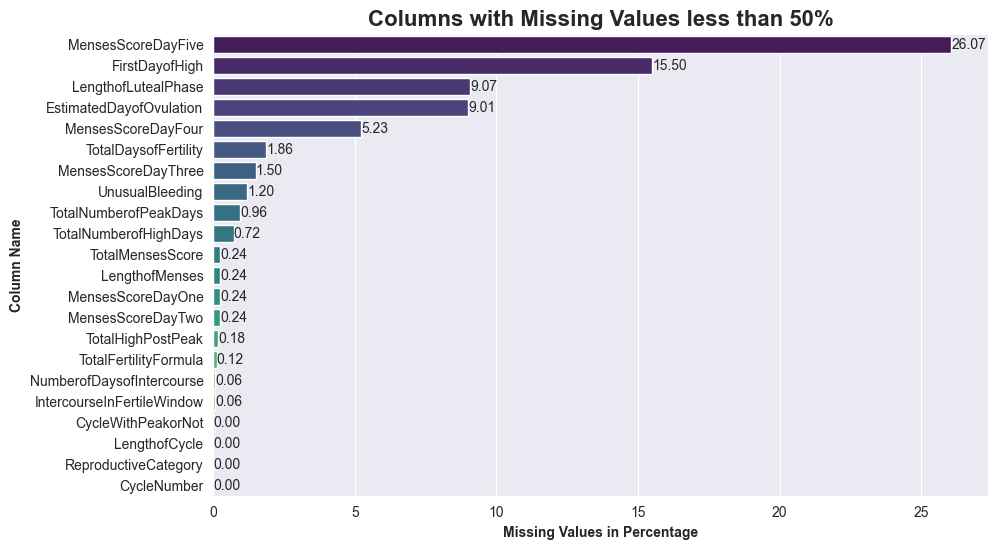

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values less than 50%', fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage', fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

**Removing Columns that have more than 50% of missing values**

In [18]:
remove_cols = null_values[null_values["Missing Values in Percentage"] >= 50]["Column Name"].tolist()
df = df.drop(columns=remove_cols)


**Removing "ClientID" since it will not contribute in predicting Cycle Length**

In [21]:
df

,CycleNumber,CycleWithPeakorNot,ReproductiveCategory,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,TotalNumberofPeakDays,TotalDaysofFertility,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,1,0,17,12,12,5,0,2,9,...,5,3,3,2,1,1,10,5,1,0
1,2,1,0,15,12,13,2,0,2,6,...,5,3,3,2,1,1,10,6,1,0
2,3,1,0,15,14,NaN,1,0,2,5,...,5,3,3,2,1,1,10,5,1,0
3,4,1,0,15,12,13,2,0,2,6,...,5,3,3,3,2,1,12,3,0,0
4,5,1,0,16,12,12,4,0,2,8,...,5,3,3,2,2,1,11,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,0,19,10,13,5,0,3,10,...,8,2,3,3,2,2,15,8,0,1
1661,8,1,0,17,11,12,3,0,4,9,...,6,3,3,2,1,1,11,11,1,0
1662,9,1,0,16,12,11,4,0,3,9,...,5,3,2,2,1,1,9,7,0,0
1663,10,1,1,27,13,13,13,0,1,NaN,...,6,2,3,3,2,1,12,3,0,0


In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df

In [22]:
categorical_columns = df.select_dtypes(include= object).columns
categorical_columns

Index(['EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'TotalMensesScore',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding'],
      dtype='object')

**Checking distribution Of Data**

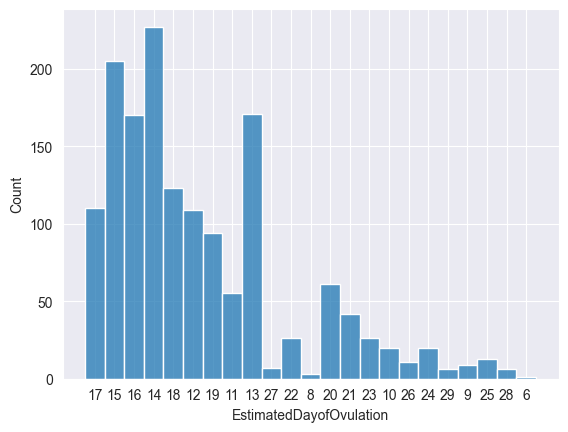

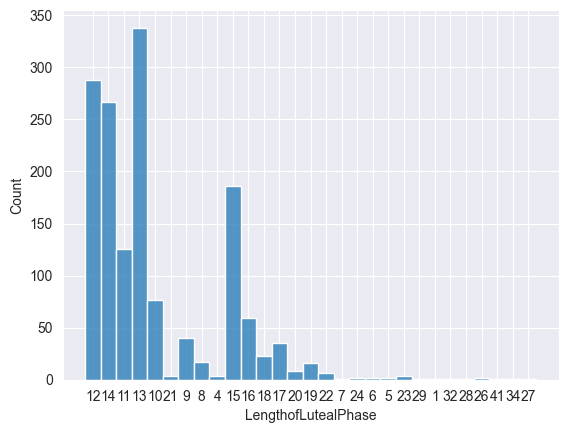

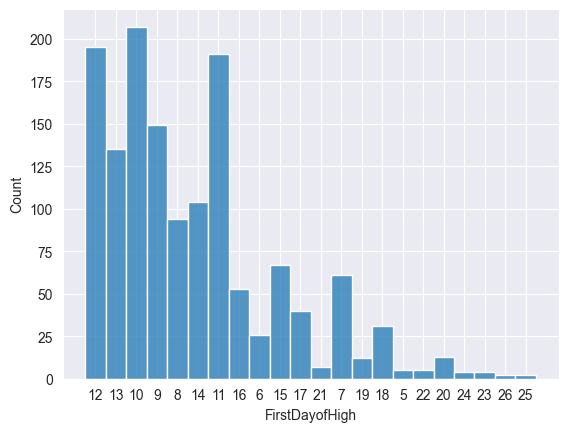

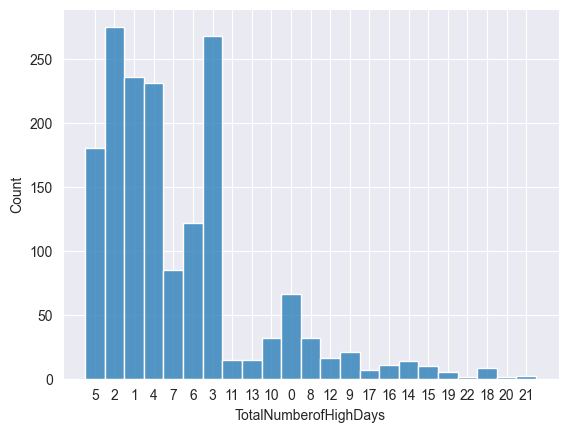

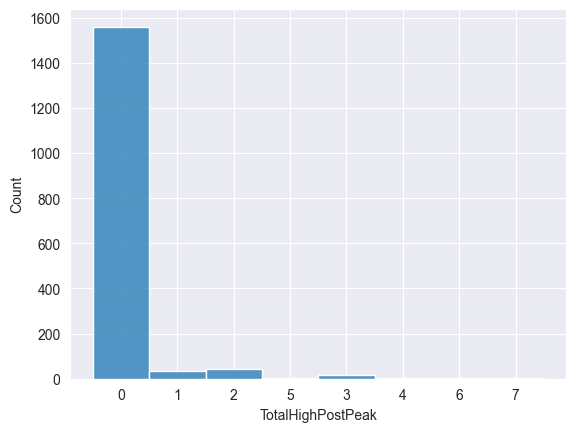

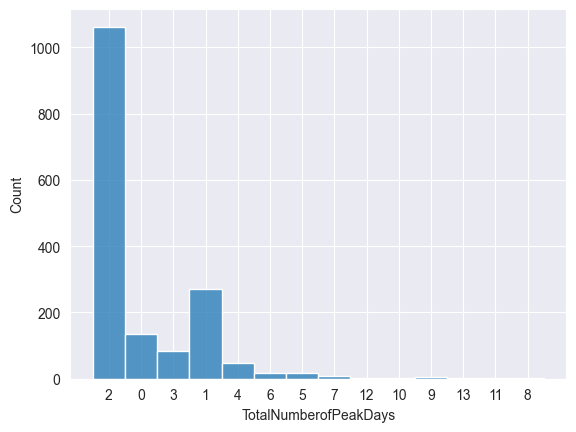

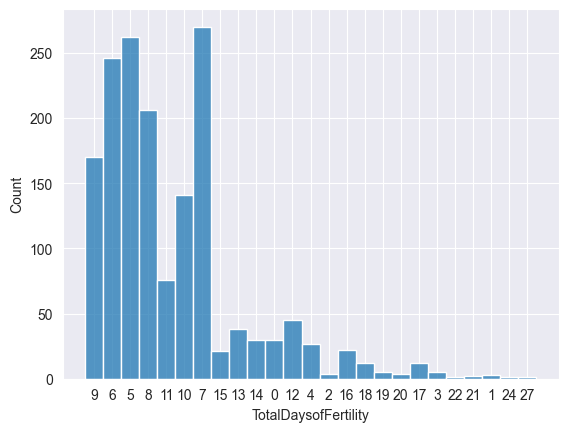

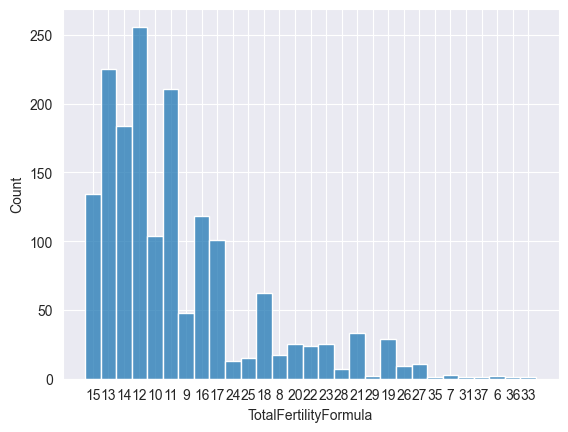

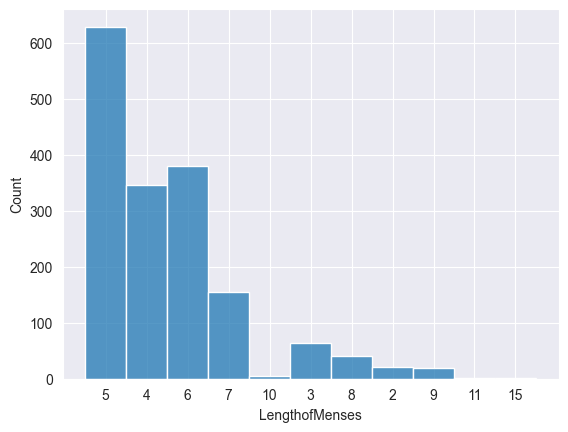

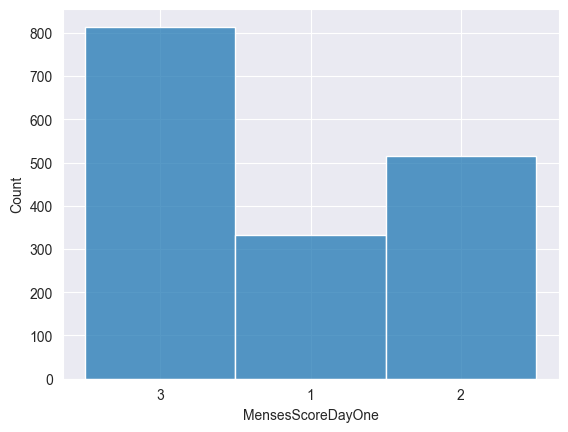

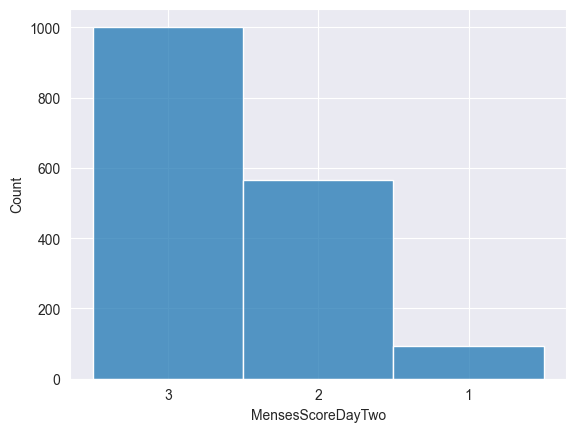

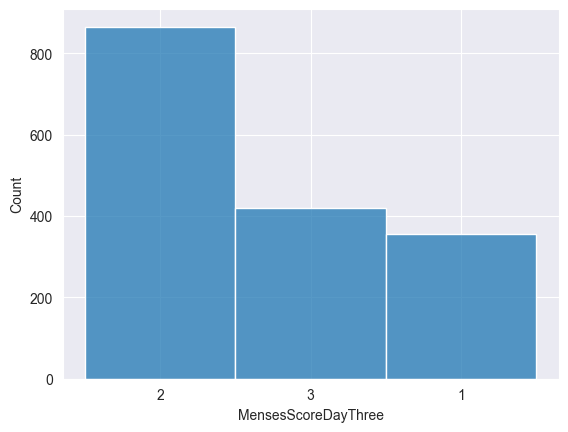

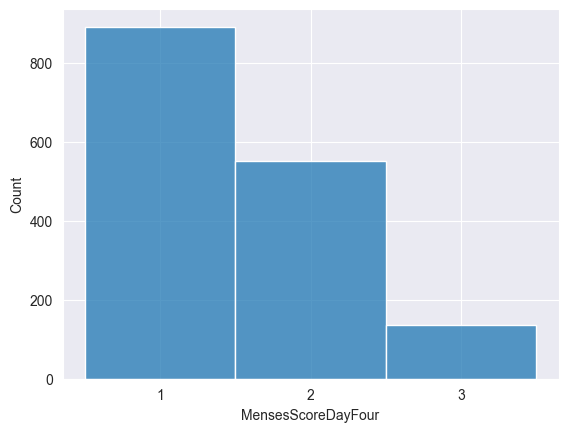

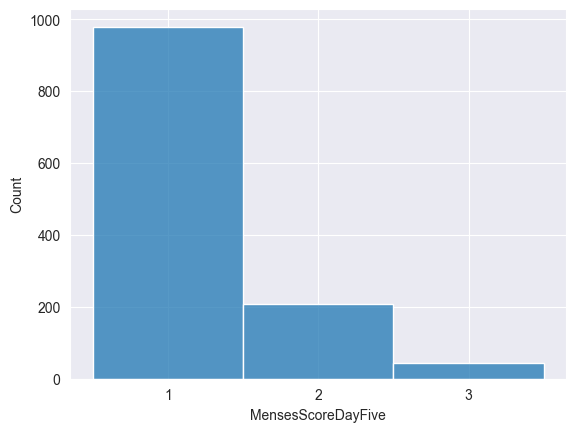

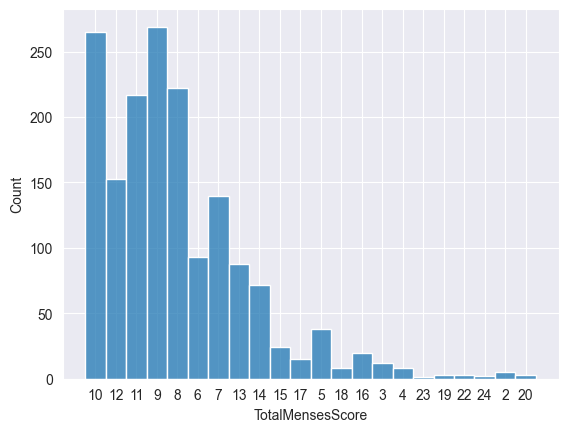

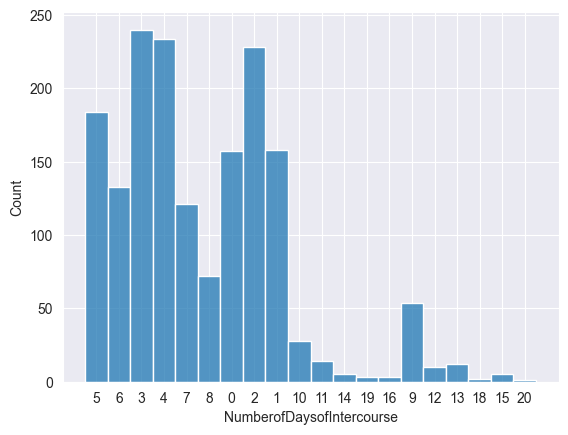

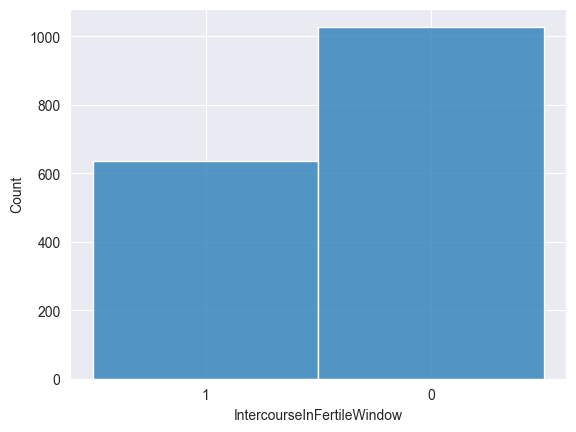

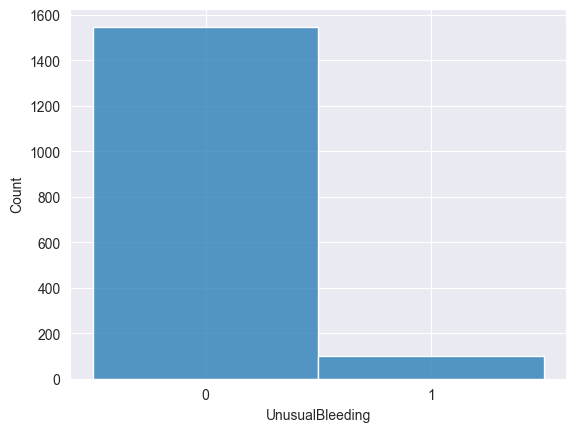

In [23]:
for i in categorical_columns:    
    sns.histplot(data=df[i])
    plt.show()

In [25]:
encoder = LabelEncoder()

for cols in categorical_columns:       
        df[cols] = pd.to_numeric(df[cols])
        df[cols] = encoder.fit_transform(df[cols])

In [26]:
for i in df.columns:
    if ( df[i].isnull().sum() ) > 100:
        df[i]= df[i].fillna(df[i].mean())

**Updated Dataset**

In [ ]:
df.columns

In [ ]:
df

In [27]:
df.drop_duplicates()

,CycleNumber,CycleWithPeakorNot,ReproductiveCategory,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,TotalNumberofPeakDays,TotalDaysofFertility,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,1,0,10,9,7,5,0,2,9,...,3,2,2,1,0,0,8,5,1,0
1,2,1,0,8,9,8,2,0,2,6,...,3,2,2,1,0,0,8,6,1,0
2,3,1,0,8,11,22,1,0,2,5,...,3,2,2,1,0,0,8,5,1,0
3,4,1,0,8,9,8,2,0,2,6,...,3,2,2,2,1,0,10,3,0,0
4,5,1,0,9,9,7,4,0,2,8,...,3,2,2,1,1,0,9,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,0,12,7,8,5,0,3,10,...,6,1,2,2,1,1,13,8,0,1
1661,8,1,0,10,8,7,3,0,4,9,...,4,2,2,1,0,0,9,11,1,0
1662,9,1,0,9,9,6,4,0,3,9,...,3,2,1,1,0,0,7,7,0,0
1663,10,1,1,20,10,8,13,0,1,25,...,4,1,2,2,1,0,10,3,0,0


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CycleNumber,1665.0,8.040841,6.593686,1.0,3.0,7.0,11.0,45.0
CycleWithPeakorNot,1665.0,0.912312,0.282925,0.0,1.0,1.0,1.0,1.0
ReproductiveCategory,1665.0,0.055255,0.479706,0.0,0.0,0.0,0.0,9.0
EstimatedDayofOvulation,1665.0,10.228228,5.254078,0.0,7.0,9.0,12.0,23.0
LengthofLutealPhase,1665.0,11.957357,5.911200,0.0,9.0,10.0,12.0,29.0
FirstDayofHigh,1665.0,9.123123,6.274460,0.0,5.0,7.0,11.0,22.0
TotalNumberofHighDays,1665.0,4.383183,3.833958,0.0,2.0,3.0,5.0,23.0
TotalHighPostPeak,1665.0,0.147748,0.697546,0.0,0.0,0.0,0.0,8.0
TotalNumberofPeakDays,1665.0,2.037237,1.673767,0.0,2.0,2.0,2.0,14.0
TotalDaysofFertility,1665.0,8.309910,3.964391,0.0,6.0,7.0,10.0,25.0


# **Handling Outliers**

In [ ]:
df

In [ ]:
df

Since variables in our dataset do not have a strong correlation with the target variable, traditional linear models like linear regression might not perform well.

In [30]:
df = df[df['UnusualBleeding'] != 2]

In [33]:
df['UnusualBleeding'].value_counts()

UnusualBleeding
0    1547
1      98
Name: count, dtype: int64

In [34]:
y = df['UnusualBleeding']
x = df.drop('UnusualBleeding', axis=1)

In [35]:
scaler =StandardScaler()
x= scaler.fit_transform(x)

In [36]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,train_size=0.8, random_state= 42)

# **Random Forest Regressor**

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [60]:
random_forest = RandomForestRegressor(n_estimators= 49, criterion="squared_error", max_depth= 67)

In [ ]:
random_forest.fit(x_train, y_train)

In [62]:
y_pred = random_forest.predict(x_test)

In [ ]:
for i in y_pred:
    if i > 38:
        print(i)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

In [ ]:
df['UnusualBleeding'].value_counts()

# **XGB** 

In [59]:
import xgboost as xgb

In [ ]:
simple_reg= xgb.XGBRegressor(objective="reg:squarederror", seeds= 123)
simple_reg.fit(x_train,y_train)

y_pred = simple_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

In [ ]:
predicted_length_of_cycle = simple_reg.predict(user_input_scaled)

print(f"Predicted Length of Cycle: {predicted_length_of_cycle[0]}")

In [52]:
import pickle

# Save the model to a file using pickle
with open('menstrual_cycle_predictor_model.pkl', 'wb') as model_file:
    pickle.dump(simple_reg, model_file)


In [ ]:
df

In [71]:
y = df["UnusualBleeding"]
x = df.drop('UnusualBleeding', axis=1)

In [ ]:
print(df.iloc[1660])


In [ ]:
df.shape

In [88]:
df['UnusualBleeding'] = df['UnusualBleeding'].replace(0.082883, 1.0000)

In [ ]:
df['UnusualBleeding'].value_counts()

In [44]:
df.iloc[90]

CycleNumber                    2
CycleWithPeakorNot             1
ReproductiveCategory           0
EstimatedDayofOvulation       12
LengthofLutealPhase            8
FirstDayofHigh                 9
TotalNumberofHighDays          1
TotalHighPostPeak              0
TotalNumberofPeakDays          4
TotalDaysofFertility           9
TotalFertilityFormula         11
LengthofMenses                 8
MensesScoreDayOne              0
MensesScoreDayTwo              1
MensesScoreDayThree            2
MensesScoreDayFour             1
MensesScoreDayFive             0
TotalMensesScore              12
NumberofDaysofIntercourse      4
IntercourseInFertileWindow     1
UnusualBleeding                1
Name: 90, dtype: int64

In [37]:
from sklearn.ensemble import RandomForestClassifier;

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)


In [38]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
user_input = {
    'CycteNumber': 2,
    'CycteWithPeakorNot': 1,
    'ReproductiveCategory': 0,
    'EstimatedDayofOvutation': 12,
    'LengthofLuteatPhase': 8,
    'FirstDayofHigh': 9,
    'TotatNumberofHighDays': 1,
    'TotatHighPostPeak': 0,
    'TotatDaysofFertitity': 9,
    'TotatNumberofPeakDays': 4,
    'TotatFertitityFormuta': 11,
    'LengthofMenses': 8,
    'MensesScoreDayOne': 0,
    'MensesScoreDayTwo': 1,
    'MensesScoreDayThree': 2,
    'MensesScoreDayFour': 1,
    'MensesScoreDayFive': 0,
    'TotatMensesScore': 12,
    'NumberofDaysofIntercourse': 4,
    'IntercourseInFertiteWindow': 1
}


user_input_values = np.array([list(user_input.values())])


user_input_scaled = scaler.transform(user_input_values)


predicted_length_of_cycle = rfc.predict(user_input_scaled)

print(f"Predicted unsual: {predicted_length_of_cycle[0]}")


Predicted unsual: 1


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
import pickle

In [48]:
with open('date_predictor.pkl', 'wb') as file:
    pickle.dump(rfc, file)